In [1]:
! pip install py7zr pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 7.0 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 3.9 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9/9 [py7zr]32m8/9 [py7zr]todomex]


In [2]:
# importation des packages
import requests
import pandas as pd
import numpy as np
import gzip
import py7zr
import io
import seaborn as sns
import os
import tempfile
import s3fs
import geopandas as gpd

## Admin express dataset: par territoire de la France Métropolitaine

In [3]:
# Config S3
S3_ENDPOINT_URL = "https://" + os.environ["AWS_S3_ENDPOINT"]
fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': S3_ENDPOINT_URL})

# Fichier 7z sur S3
FILE_PATH_S3 = "sophiemonsi/PROJET_3A_ML/ADMIN-EXPRESS_4-0__GPKG_LAMB93_FXX_2025-10-15.7z"

# Lecture du 7z
with fs.open(FILE_PATH_S3, mode="rb") as file_in:
    file_content = file_in.read()

# Décompression dans un dossier temporaire
with tempfile.TemporaryDirectory() as tmpdir:
    with py7zr.SevenZipFile(io.BytesIO(file_content), mode='r') as archive:
        archive.extractall(path=tmpdir)

    # Afficher les fichiers extraits
    for root, dirs, files in os.walk(tmpdir):
        for f in files:
            print("Fichier extrait :", os.path.join(root, f))

    # Fichier d'intérêt
    gpkg_path = os.path.join(
        tmpdir,
        "ADMIN-EXPRESS_4-0__GPKG_LAMB93_FXX_2025-10-15",
        "ADMIN-EXPRESS",
        "1_DONNEES_LIVRAISON_2025-10-00142",
        "ADE_4-0_GPKG_LAMB93_FXX-ED2025-10-15",
        "ADE_4-0_GPKG_LAMB93_FXX-ED2025-10-15.gpkg"
    )
    gdf = gpd.read_file(gpkg_path)
    gdf_communes = gpd.read_file(gpkg_path, layer="commune").to_crs(2154)
    gdf_deps = gpd.read_file(gpkg_path, layer="departement").to_crs(2154)


Fichier extrait : /tmp/tmpmpyg40we/ADMIN-EXPRESS_4-0__GPKG_LAMB93_FXX_2025-10-15/ADMIN-EXPRESS/LISEZ-MOI.pdf
Fichier extrait : /tmp/tmpmpyg40we/ADMIN-EXPRESS_4-0__GPKG_LAMB93_FXX_2025-10-15/ADMIN-EXPRESS/2_METADONNEES_LIVRAISON_2025-10-00142/ADE_4-0_GPKG_LAMB93_FXX-ED2025-10-15/LISEZ_MOI.txt
Fichier extrait : /tmp/tmpmpyg40we/ADMIN-EXPRESS_4-0__GPKG_LAMB93_FXX_2025-10-15/ADMIN-EXPRESS/1_DONNEES_LIVRAISON_2025-10-00142/ADE_4-0_GPKG_LAMB93_FXX-ED2025-10-15/ADE_4-0_GPKG_LAMB93_FXX-ED2025-10-15.gpkg
Fichier extrait : /tmp/tmpmpyg40we/ADMIN-EXPRESS_4-0__GPKG_LAMB93_FXX_2025-10-15/ADMIN-EXPRESS/3_SUPPLEMENTS_LIVRAISON_2025-10-00142/ADE_4-0_GPKG_LAMB93_FXX-ED2025-10-15/EMPRISE/EMPRISE.dbf
Fichier extrait : /tmp/tmpmpyg40we/ADMIN-EXPRESS_4-0__GPKG_LAMB93_FXX_2025-10-15/ADMIN-EXPRESS/3_SUPPLEMENTS_LIVRAISON_2025-10-00142/ADE_4-0_GPKG_LAMB93_FXX-ED2025-10-15/EMPRISE/EMPRISE.cpg
Fichier extrait : /tmp/tmpmpyg40we/ADMIN-EXPRESS_4-0__GPKG_LAMB93_FXX_2025-10-15/ADMIN-EXPRESS/3_SUPPLEMENTS_LIVRAISON_

/opt/python/lib/python3.13/site-packages/pyogrio/raw.py:198: RuntimeWarning: Field format 'character varying' not supported
  return ogr_read(
/opt/python/lib/python3.13/site-packages/pyogrio/raw.py:198: RuntimeWarning: Field format 'character varying(256)' not supported
  return ogr_read(
/opt/python/lib/python3.13/site-packages/pyogrio/raw.py:198: RuntimeWarning: Field format 'character varying(30)' not supported
  return ogr_read(
/opt/python/lib/python3.13/site-packages/pyogrio/raw.py:198: RuntimeWarning: Field format 'timestamp with time zone' not supported
  return ogr_read(
/opt/python/lib/python3.13/site-packages/pyogrio/geopandas.py:275: UserWarning: More than one layer found in 'ADE_4-0_GPKG_LAMB93_FXX-ED2025-10-15.gpkg': 'canton' (default), 'arrondissement', 'arrondissement_municipal', 'chef_lieu_d_arrondissement', 'chef_lieu_d_arrondissement_municipal', 'chef_lieu_de_canton', 'chef_lieu_de_collectivite_territoriale', 'chef_lieu_de_commune', 'chef_lieu_de_commune_associee_ou

In [5]:
gdf_communes.head()

,cleabs,nom_officiel,nom_officiel_en_majuscules,statut,code_insee,population,date_du_recensement,organisme_recenseur,code_insee_du_canton,code_insee_de_l_arrondissement,code_insee_du_departement,code_insee_de_la_region,codes_siren_des_epci,code_siren,code_postal,superficie_cadastrale,geometry
0,COMMUNE_0000000000001001,L'Abergement-Clémenciat,L'ABERGEMENT-CLEMENCIAT,Commune simple,01001,859,2022-01-01,INSEE,0108,012,01,84,200069193,210100012,01400,1590,"MULTIPOLYGON (((851129.6 6563369.2, 851107.5 6..."
1,COMMUNE_0000000000001002,L'Abergement-de-Varey,L'ABERGEMENT-DE-VAREY,Commune simple,01002,273,2022-01-01,INSEE,0101,011,01,84,240100883,210100020,01640,920,"MULTIPOLYGON (((888109.7 6545455.9, 888102.9 6..."
2,COMMUNE_0000000000001004,Ambérieu-en-Bugey,AMBERIEU-EN-BUGEY,Commune simple,01004,15554,2022-01-01,INSEE,0101,011,01,84,240100883,210100046,01500,2460,"MULTIPOLYGON (((886593 6540886, 886567.9 65408..."
3,COMMUNE_0000000000001005,Ambérieux-en-Dombes,AMBERIEUX-EN-DOMBES,Commune simple,01005,1917,2022-01-01,INSEE,0122,012,01,84,200042497,210100053,01330,1590,"MULTIPOLYGON (((850413.2 6544061, 850381.8 654..."
4,COMMUNE_0000000000001006,Ambléon,AMBLEON,Commune simple,01006,114,2022-01-01,INSEE,0104,011,01,84,200040350,210100061,01300,590,"MULTIPOLYGON (((899820.1 6520340.2, 899925.2 6..."


In [ ]:

len(gdf["code_insee_du_departement"].unique())
# 95 département, correspond avec les données du niveau d'argile

In [4]:
# base des communes
gdf_communes = gpd.read_file(gpkg_path, layer="commune").to_crs(2154)
#base des départements
gdf_deps      = gpd.read_file(gpkg_path, layer="departement").to_crs(2154)
gdf_deps.head()

DataSourceError: /tmp/tmpmpyg40we/ADMIN-EXPRESS_4-0__GPKG_LAMB93_FXX_2025-10-15/ADMIN-EXPRESS/1_DONNEES_LIVRAISON_2025-10-00142/ADE_4-0_GPKG_LAMB93_FXX-ED2025-10-15/ADE_4-0_GPKG_LAMB93_FXX-ED2025-10-15.gpkg: No such file or directory

## Données BRGM

In [6]:

# Décompresser le dossier 

def extract_7z(url: str):
    import requests
    from io import BytesIO

    # Téléchargement
    response = requests.get(url)
    response.raise_for_status()

    # Stockage temporaire
    data = BytesIO(response.content)

    # Extraction
    tmp_dir = tempfile.mkdtemp()
    with py7zr.SevenZipFile(data, mode='r') as z:
        z.extractall(path=tmp_dir)

    return tmp_dir

# Chercher chaque fichier .mbtiles dans le dossier
def find_mbtiles(folder):
    for root, _, files in os.walk(folder):
        for f in files:
            if f.endswith(".mbtiles"):
                return os.path.join(root, f)
    return None

In [7]:
import sqlite3
import pandas as pd

# Lecture de chaque fichier .mbtiles 
def mbtiles_to_dfs(mbtiles_path):
    conn = sqlite3.connect(mbtiles_path)

    # Récupérer la liste des tables
    tables = pd.read_sql_query(
        "SELECT name FROM sqlite_master WHERE type='table';", conn
    )["name"].tolist()

    dfs = {}
    for t in tables:
        try:
            dfs[t] = pd.read_sql_query(f"SELECT * FROM {t}", conn)
        except Exception as e:
            print("Impossible de lire table", t, ":", e)

    conn.close()
    return dfs


In [8]:
# ressort un dictionnaire de datatframes
def load_mbtiles_7z(url):
    folder = extract_7z(url)
    mbtiles = find_mbtiles(folder)
    if mbtiles is None:
        raise FileNotFoundError("Aucun fichier .mbtiles trouvé")
        
    print("Fichier mbtiles trouvé :", mbtiles)
    dfs = mbtiles_to_dfs(mbtiles)
    return dfs

url = "https://www.data.gouv.fr/api/1/datasets/r/c944be1e-06d6-46be-bf7d-9f9ad2b8ced9"

dfs = load_mbtiles_7z(url)

for name, df in dfs.items():
    print("----", name, "----")
    print(df.head())


Fichier mbtiles trouvé : /tmp/tmpr5oql2s3/ExpoArgile_Fxx_4326.mbtiles
---- metadata ----
          name                        value
0         name  ExpoArgile_Fxx_4326.mbtiles
1  description  ExpoArgile_Fxx_4326.mbtiles
2      version                            2
3      minzoom                            2
4      maxzoom                           15
---- map ----
   zoom_level  tile_column  tile_row               tile_id
0           2            1         2   4211784313116134269
1           2            2         2  11520501979463196428
2           3            4         4  16037601933804047707
3           3            3         5  10112098421134192041
4           3            4         5   4502018209664967852
---- images ----
   zoom_level                                          tile_data  \
0           2  b'\x1f\x8b\x08\x00\x00\x00\x00\x00\x02\x13\x9c...   
1           2  b'\x1f\x8b\x08\x00\x00\x00\x00\x00\x02\x13\x8c...   
2           3  b'\x1f\x8b\x08\x00\x00\x00\x00\x00\x02\x13\

In [16]:
dfs["metadata"] # Métadonnées

,name,value
0,name,ExpoArgile_Fxx_4326.mbtiles
1,description,ExpoArgile_Fxx_4326.mbtiles
2,version,2
3,minzoom,2
4,maxzoom,15
5,center,"1.631470,45.947330,15"
6,bounds,"-5.133440,41.365782,9.559960,51.076490"
7,type,overlay
8,format,pbf
9,generator,tippecanoe v2.22.0


In [9]:
# Conversion du format pbf en geojson
! pip install mapbox-vector-tile mercantile geopandas shapely brotli

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.5/962.5 kB 23.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [mapbox-vector-tile]


In [10]:
import gzip
import mapbox_vector_tile

# Décompression du GZIP
def decode_mvt(tile_data: bytes) -> dict:
    """
    Décompresse GZIP puis décode MVT → dictionnaire Python
    """
    try:
        raw = gzip.decompress(tile_data)
        return mapbox_vector_tile.decode(raw)
    except Exception as e:
        raise RuntimeError(f"Erreur de décompression/décodage MVT: {e}")

# Conversion en GeoJSON (manipulation des données géométrique)
import geopandas as gpd
from shapely.geometry import shape

def mvt_dict_to_gdf(decoded: dict) -> gpd.GeoDataFrame:
    feats = []
    
    for layer_name, layer in decoded.items():
        for feat in layer["features"]:
            geom = shape(feat["geometry"])
            props = feat["properties"]
            props["__layer__"] = layer_name
            props["geometry"] = geom
            feats.append(props)

    return gpd.GeoDataFrame(feats, geometry="geometry", crs="EPSG:3857")

# conversion en geodataframe
def tiles_to_geodata(map_df, images_df, max_tiles=None):
    merged = map_df.merge(images_df, on=["zoom_level", "tile_id"])
    gdfs = []
    nbad = 0
    
    for i, row in merged.iterrows():
        if max_tiles and i >= max_tiles:
            break

        try:
            decoded = decode_mvt(row["tile_data"])
            gdf = mvt_dict_to_gdf(decoded)
            
            # Ajout champs z/x/y
            gdf["z"] = int(row["zoom_level"])
            gdf["x"] = int(row["tile_column"])
            gdf["y"] = int(row["tile_row"])
            
            gdfs.append(gdf)
        
        except Exception:
            nbad += 1
    
    if not gdfs:
        raise RuntimeError("Aucune tuile lisible !")
    
    print(f"Tuiles décodées : {len(gdfs)} | ignorées : {nbad}")
    return pd.concat(gdfs, ignore_index=True)

gdf_raw = tiles_to_geodata(dfs["map"], dfs["images"], max_tiles=50)
gdf_raw.head()



Tuiles décodées : 50 | ignorées : 0


,DPT,NIVEAU,ALEA,__layer__,geometry,z,x,y
0,50,1,Faible,ExpoArgile_Fxx_4326,"POLYGON ((4011 2613, 4011 2611, 4009 2611, 400...",2,1,2
1,50,2,Moyen,ExpoArgile_Fxx_4326,"POLYGON ((4013 2611, 4013 2609, 4011 2609, 401...",2,1,2
2,50,1,Faible,ExpoArgile_Fxx_4326,"POLYGON ((4015 2612, 4015 2610, 4013 2610, 401...",2,1,2
3,50,1,Faible,ExpoArgile_Fxx_4326,"POLYGON ((4017 2602, 4017 2600, 4015 2600, 401...",2,1,2
4,50,1,Faible,ExpoArgile_Fxx_4326,"POLYGON ((4012 2603, 4012 2604, 4018 2601, 401...",2,1,2


In [ ]:
# Affichage de la première tuile
#sample = dfs["images"].iloc[0]["tile_data"]
#decoded = decode_mvt(sample)
#decoded

In [11]:
# Reprojection en WGS84
gdf_wgs84 = gdf_raw.to_crs(4326)
gdf_wgs84.head()


,DPT,NIVEAU,ALEA,__layer__,geometry,z,x,y
0,50,1,Faible,ExpoArgile_Fxx_4326,"POLYGON ((0.03603 0.02347, 0.03603 0.02346, 0....",2,1,2
1,50,2,Moyen,ExpoArgile_Fxx_4326,"POLYGON ((0.03605 0.02346, 0.03605 0.02344, 0....",2,1,2
2,50,1,Faible,ExpoArgile_Fxx_4326,"POLYGON ((0.03607 0.02346, 0.03607 0.02345, 0....",2,1,2
3,50,1,Faible,ExpoArgile_Fxx_4326,"POLYGON ((0.03609 0.02337, 0.03609 0.02336, 0....",2,1,2
4,50,1,Faible,ExpoArgile_Fxx_4326,"POLYGON ((0.03604 0.02338, 0.03604 0.02339, 0....",2,1,2


In [20]:
print(gdf_wgs84.geom_type.value_counts())

Polygon         173300
MultiPolygon     20129
Name: count, dtype: int64


## DAILY SWI

In [3]:
#Fonction pour récupérer les données d'un fichier csv.gz ( pour les données météorologiques )
def recuperer_donnees_gz(dataset_id, fichier_csv, sep):
    """
    Cette fonction télécharge les données d'un fichier CSV.GZ à partir d'une URL et les charge dans un DataFrame pandas.
    
    Paramètres:
    dataset_id (str): identifiant du fichier CSV.GZ.
    fichier_csv (str): Le nom du fichier CSV.GZ à enregistrer localement.
    sep ( str ) : le séparateur à utiliser
    
    Retourne:
    DataFrame: Un DataFrame pandas contenant les données du fichier CSV.
    """

    # URL de base pour accéder à l'API
    base_api = "https://www.data.gouv.fr/api/1/"

    # Chemin pour accéder aux enregistrements du dataset
    key_api = "datasets/r/"

    # Construction de l'URL complète
    url = f"{base_api}{key_api}{dataset_id}"


    response = requests.get(url)
    response.raise_for_status()
    with gzip.GzipFile(fileobj=io.BytesIO(response.content)) as gz:
        df = pd.read_csv(gz, sep = sep)
    
    return df

In [48]:
#liste_id=['eb0d6e42-cee6-4d7c-bc5b-646be4ced72e','33417617-c0dd-4513-804e-c3f563cb81b4','08ad5936-cb9e-4284-a6fc-36b29aca9607',
#          'ad584d65-7d2d-4ff1-bc63-4f93357ed196','10d2ce77-5c3b-44f8-bb46-4df27ed48595','da6cd598-498b-4e39-96ea-fae89a4a8a46',
#          '92065ec0-ea6f-4f5e-8827-4344179c0a7f','adcca99a-6db0-495a-869f-40c888174a57']
liste_id=['ad584d65-7d2d-4ff1-bc63-4f93357ed196','10d2ce77-5c3b-44f8-bb46-4df27ed48595','da6cd598-498b-4e39-96ea-fae89a4a8a46',
          '92065ec0-ea6f-4f5e-8827-4344179c0a7f','adcca99a-6db0-495a-869f-40c888174a57']
# année=[1960-1969,1970-1979,1980-1989,'1990-1999',2000-2009,2010-2019,2020-202510,20251001-20251107]

In [22]:
# calcul des données mensuelles à partir des variables météorologiques
def compute_mean_swi(data_id, value_cols=None):
    df= recuperer_donnees_gz(data_id, '', ';')
    df["YEAR"] = df["DATE"].astype(str).str[:4].astype(int)
    df["MONTH"] = df["DATE"].astype(str).str[4:6]
    df=df.drop("DATE",axis=1)
    # Colonnes clés
    group_cols = ["LAMBX", "LAMBY", "YEAR", "MONTH"]

    # Déterminer les colonnes à moyenner
    if value_cols is None:
        # On prend toutes les colonnes numériques sauf YEAR/MONTH/LAMBX/LAMBY
        exclude = set(group_cols)
        num_cols = [c for c in df.select_dtypes(include="number").columns
                    if c not in exclude]
        value_cols = num_cols
     # Agrégation
    out = (
        df[group_cols + value_cols]
        .groupby(group_cols, as_index=False)
        .mean()
    )
     # Recréer une DATE mensuelle (au 1er jour du mois)
    
    return out

# extraction des données de 2020-2025
data20_25=compute_mean_swi(data_id='92065ec0-ea6f-4f5e-8827-4344179c0a7f')
data20_25.head()

,LAMBX,LAMBY,YEAR,MONTH,PRENEI,PRELIQ,T,FF,Q,DLI,...,RESR_NEIGE6,HTEURNEIGE,HTEURNEIGE6,HTEURNEIGEX,SNOW_FRAC,ECOULEMENT,WG_RACINE,WGI_RACINE,TINF_H,TSUP_H
0,600,24010,2020,01,0.0,3.370968,8.854839,6.019355,6.281355,2918.677419,...,0.0,0.0,0.0,0.0,0.0,0.0,0.314161,0.0,6.890323,10.603226
1,600,24010,2020,02,0.0,5.124138,9.568966,8.234483,6.346655,2912.062069,...,0.0,0.0,0.0,0.0,0.0,0.0,0.315621,0.0,7.627586,11.541379
2,600,24010,2020,03,0.0,2.164516,8.845161,6.816129,5.750774,2791.793548,...,0.0,0.0,0.0,0.0,0.0,0.0,0.313452,0.0,6.629032,11.303226
3,600,24010,2020,04,0.0,2.260000,12.263333,4.380000,7.068567,2902.943333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.283333,0.0,9.190000,15.906667
4,600,24010,2020,05,0.0,0.709677,14.567742,4.990323,7.591258,2905.525806,...,0.0,0.0,0.0,0.0,0.0,0.0,0.276097,0.0,11.245161,18.403226


In [24]:
data20_25.columns

Index(['LAMBX', 'LAMBY', 'YEAR', 'MONTH', 'PRENEI', 'PRELIQ', 'T', 'FF', 'Q',
       'DLI', 'SSI', 'HU', 'EVAP', 'ETP', 'PE', 'SWI', 'SSWI_10J', 'DRAINC',
       'RUNC', 'RESR_NEIGE', 'RESR_NEIGE6', 'HTEURNEIGE', 'HTEURNEIGE6',
       'HTEURNEIGEX', 'SNOW_FRAC', 'ECOULEMENT', 'WG_RACINE', 'WGI_RACINE',
       'TINF_H', 'TSUP_H'],
      dtype='object')

In [208]:
#Fusion des tables
#liste_df=[]
#for id in liste_id:
#    data=compute_mean_swi(data_id=id)
#    liste_df.append(data)
#daily_swi_df=pd.concat(liste_df,ignore_index=True)
#daily_swi_df.shape

Je veux essayer une méthode d'agregation pondérée: Je vais affecter des poids à chaque jour, basés sur la quantité de pluie et d'évapotranspiration. En gros, les jours de pluie auront un poids plus grand dans le calcul du swi mensuel, et les jours d'évapotranspiration auront moins de poids

In [4]:
# Chargement de la base 2020-2025
df_swi_25 = recuperer_donnees_gz('92065ec0-ea6f-4f5e-8827-4344179c0a7f', '', ';')

In [29]:
df_monthly.shape

(70, 28)

In [39]:
def build_monthly_base(df_swi_25):
    # --- Préparation ---
    df = df_swi_25.copy()
    df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')
    df = df.sort_values('DATE').set_index('DATE')

    # --- Agrégation mensuelle par moyenne ---
    df_monthly = df.resample('MS').mean()

    # --- Calcul des poids pour SWI pondéré ---
    df['poids'] = ((df['PE'].fillna(0) + df['PRELIQ'].fillna(0)) /
                   (df['ETP'].fillna(0) + 1)).clip(lower=0)

    def weighted_swi(group):
        w, x = group['poids'], group['SWI']
        if w.sum() <= 0:
            return x.mean()
        val = (x * w).sum() / w.sum()
        return min (val,1)  # sécurité : bornage dans [0,1]

    swi_weighted = df.groupby(pd.Grouper(freq='MS')).apply(weighted_swi)

    # --- Ajouter SWI pondéré et SWI non pondéré ---
    df_monthly['SWI_mean'] = df_monthly['SWI']   # moyenne simple
    df_monthly['SWI_weighted'] = swi_weighted

    # --- Remplacer l’index par une colonne MOIS (YYYY-MM) ---
    df_monthly = df_monthly.reset_index()
    df_monthly['MOIS'] = df_monthly['DATE'].dt.to_period('M').astype(str)
    df_monthly = df_monthly.drop(columns=['DATE'])

    return df_monthly


In [40]:
df_monthly = build_monthly_base(df_swi_25)

In [41]:
df_monthly.head()

,LAMBX,LAMBY,PRENEI,PRELIQ,T,FF,Q,DLI,SSI,HU,...,HTEURNEIGEX,SNOW_FRAC,ECOULEMENT,WG_RACINE,WGI_RACINE,TINF_H,TSUP_H,SWI_mean,SWI_weighted,MOIS
0,6553.950667,21772.98423,0.186299,1.776196,5.337645,3.116235,4.931343,2630.966455,449.769278,83.143418,...,0.069525,0.060404,0.111678,0.304761,0.002269,2.928321,7.961842,0.907498,0.938375,2020-01
1,6553.950667,21772.98423,0.380710,2.820790,7.196033,4.279695,5.247727,2613.338233,679.863265,78.222678,...,0.074613,0.061202,0.349899,0.307954,0.002076,4.436945,10.167501,0.928867,0.983853,2020-02
2,6553.950667,21772.98423,0.320085,2.226325,6.995665,3.402470,4.946664,2557.322343,1158.526097,74.808859,...,0.082931,0.056638,0.416299,0.306355,0.001962,3.569702,10.551707,0.914591,1.000000,2020-03
3,6553.950667,21772.98423,0.062823,1.831248,12.133304,2.427573,6.209311,2674.064498,1737.698530,67.462303,...,0.040761,0.030164,0.599061,0.270122,0.001460,7.616045,16.947815,0.655610,0.704184,2020-04
4,6553.950667,21772.98423,0.105099,2.354951,14.736024,2.778430,7.579392,2809.286479,2162.197732,70.187789,...,0.020874,0.013609,0.381670,0.268856,0.000907,10.509316,18.952678,0.641851,0.777000,2020-05


In [ ]:
#Je construis maintenant la table complète avec toutes les dates
liste_id=['5dfb33b3-fae5-4d0e-882d-7db74142bcae','eb0d6e42-cee6-4d7c-bc5b-646be4ced72e','33417617-c0dd-4513-804e-c3f563cb81b4',
            '08ad5936-cb9e-4284-a6fc-36b29aca9607','ad584d65-7d2d-4ff1-bc63-4f93357ed196','10d2ce77-5c3b-44f8-bb46-4df27ed48595',
            'da6cd598-498b-4e39-96ea-fae89a4a8a46','92065ec0-ea6f-4f5e-8827-4344179c0a7f','']
liste_df=[]
for id in liste_id:
    data = recuperer_donnees_gz(id, '', ';')
    data_mensuel = build_monthly_base(data)
    liste_df.append(data_mensuel)
    
daily_swi_df=pd.concat(liste_df,ignore_index=True)
daily_swi_df.shape

In [42]:
import pandas as pd
import requests, gzip, io

def recuperer_donnees_gz(resource_id, sep=";"):
    """
    Télécharge un fichier CSV.GZ depuis data.gouv et le charge dans un DataFrame.
    """
    url = f"https://www.data.gouv.fr/fr/datasets/r/{resource_id}"
    response = requests.get(url)
    response.raise_for_status()
    with gzip.GzipFile(fileobj=io.BytesIO(response.content)) as gz:
        df = pd.read_csv(gz, sep=sep)
    return df


def build_monthly_base(df, date_col='DATE', swi_col='SWI',
                       pe_col='PE', preliq_col='PRELIQ', etp_col='ETP'):
    """
    Transforme une base journalière en base mensuelle avec SWI_mean et SWI_weighted.
    """
    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col], format='%Y%m%d')
    df = df.sort_values(date_col).set_index(date_col)

    # Agrégation par moyenne
    df_monthly = df.resample('MS').mean()

    # Poids pour SWI pondéré
    df['poids'] = ((df[pe_col].fillna(0) + df[preliq_col].fillna(0)) /
                   (df[etp_col].fillna(0) + 1)).clip(lower=0)

    def weighted_swi(group):
        w, x = group['poids'], group[swi_col]
        if w.sum() <= 0:
            return np.nan
        val = (x * w).sum() / w.sum()
        return min(1, max(0, val))

    swi_weighted = df.groupby(pd.Grouper(freq='MS')).apply(weighted_swi)

    df_monthly['SWI_mean'] = df_monthly[swi_col]
    df_monthly['SWI_weighted'] = swi_weighted

    df_monthly = df_monthly.reset_index()
    df_monthly['MOIS'] = df_monthly[date_col].dt.to_period('M').astype(str)
    df_monthly = df_monthly.drop(columns=[date_col])

    return df_monthly


# --- Pipeline général ---
liste_id = [
    '5dfb33b3-fae5-4d0e-882d-7db74142bcae',
    'eb0d6e42-cee6-4d7c-bc5b-646be4ced72e',
    '33417617-c0dd-4513-804e-c3f563cb81b4',
    '08ad5936-cb9e-4284-a6fc-36b29aca9607',
    'ad584d65-7d2d-4ff1-bc63-4f93357ed196',
    '10d2ce77-5c3b-44f8-bb46-4df27ed48595',
    'da6cd598-498b-4e39-96ea-fae89a4a8a46',
    '92065ec0-ea6f-4f5e-8827-4344179c0a7f'
]

base_generale = pd.DataFrame()

for rid in liste_id:
    print("Traitement de :", rid)
    data = recuperer_donnees_gz(rid, sep=";")
    data_mensuel = build_monthly_base(data)
    base_generale = pd.concat([base_generale, data_mensuel], ignore_index=True)

print(base_generale.shape)

Traitement de : 5dfb33b3-fae5-4d0e-882d-7db74142bcae
Traitement de : eb0d6e42-cee6-4d7c-bc5b-646be4ced72e
Traitement de : 33417617-c0dd-4513-804e-c3f563cb81b4
Traitement de : 08ad5936-cb9e-4284-a6fc-36b29aca9607
Traitement de : ad584d65-7d2d-4ff1-bc63-4f93357ed196
Traitement de : 10d2ce77-5c3b-44f8-bb46-4df27ed48595
Traitement de : da6cd598-498b-4e39-96ea-fae89a4a8a46
Traitement de : 92065ec0-ea6f-4f5e-8827-4344179c0a7f
(807, 31)


In [43]:
base_generale.to_csv("swi_journalier_merge.csv", sep=";", index=False)

Je viens de me rendre compte que le swi uniforme pouvait depasser 1. Donc il faudra modifier le code et recompiler mais ça prends trop de temps (35 min), je vais d'abord continuer comme ça :)

In [ ]:
def build_monthly_base_by_point(df_swi_25):
    import pandas as pd

    df = df_swi_25.copy()

    # --- Transformation des dates ---
    df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')
    df['MOIS'] = df['DATE'].dt.to_period('M').astype(str)

    # --- Calcul des poids ---
    df['poids'] = ((df['PE'].fillna(0) + df['PRELIQ'].fillna(0)) /
                   (df['ETP'].fillna(0) + 1)).clip(lower=0)

    # --- Colonnes de regroupement ---
    group_cols = ['MOIS', 'LAMBX', 'LAMBY']

    # --- Liste des autres colonnes à agréger par moyenne simple ---
    exclude_cols = group_cols + ['DATE', 'SWI', 'poids']
    other_cols = [c for c in df.columns if c not in exclude_cols]

    # --- Fonction pour SWI pondéré ---
    def weighted_swi_df(group):
        w = group['poids']
        x = group['SWI']
        if w.sum() <= 0:
            return x.mean()
        return (x * w).sum() / w.sum()

    # --- Groupby et agrégation ---
    df_monthly = df.groupby(group_cols).apply(
        lambda g: pd.Series({
            'SWI_mean': g['SWI'].mean(),
            'SWI_weighted': weighted_swi_df(g),
            **{c: g[c].mean() for c in other_cols}
        })
    ).reset_index()

    return df_monthly



df_monthly = build_monthly_base_by_point(df_swi_25)
df_monthly.head()

/tmp/ipykernel_4586/3937670668.py:30: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_monthly = df.groupby(group_cols).apply(


,MOIS,LAMBX,LAMBY,SWI_mean,SWI_weighted,PRENEI,PRELIQ,T,FF,Q,...,RESR_NEIGE6,HTEURNEIGE,HTEURNEIGE6,HTEURNEIGEX,SNOW_FRAC,ECOULEMENT,WG_RACINE,WGI_RACINE,TINF_H,TSUP_H
0,2020-01,600,24010,0.936677,0.940935,0.0,3.370968,8.854839,6.019355,6.281355,...,0.0,0.0,0.0,0.0,0.0,0.0,0.314161,0.0,6.890323,10.603226
1,2020-01,760,23610,0.955968,0.959461,0.0,2.764516,9.196774,5.532258,6.290258,...,0.0,0.0,0.0,0.0,0.0,0.0,0.261290,0.0,7.419355,10.729032
2,2020-01,760,23930,0.935871,0.938851,0.0,2.745161,9.306452,5.522581,6.327903,...,0.0,0.0,0.0,0.0,0.0,0.0,0.317290,0.0,7.496774,10.861290
3,2020-01,760,24010,0.967194,0.977247,0.0,3.454839,8.419355,6.080645,6.127290,...,0.0,0.0,0.0,0.0,0.0,0.0,0.317129,0.0,6.529032,10.132258
4,2020-01,760,24090,0.964806,0.975848,0.0,3.432258,8.583871,6.051613,6.183355,...,0.0,0.0,0.0,0.0,0.0,0.0,0.317226,0.0,6.674194,10.290323


In [13]:
# Creation d'un systeme de fichier S3
S3_ENDPOINT_URL = "https://" + os.environ["AWS_S3_ENDPOINT"]
fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': S3_ENDPOINT_URL})

#Lecture des données
FILE_PATH_S3 = "sophiemonsi/PROJET_3A_ML/swi_journalier_merge.csv"
with fs.open(FILE_PATH_S3, mode="rb") as file_in:
    df_daily_swi = pd.read_csv(file_in, sep=";")
df_daily_swi.head()

,MOIS,LAMBX,LAMBY,SWI_mean,SWI_weighted,PRENEI,PRELIQ,T,FF,Q,...,RESR_NEIGE6,HTEURNEIGE,HTEURNEIGE6,HTEURNEIGEX,SNOW_FRAC,ECOULEMENT,WG_RACINE,WGI_RACINE,TINF_H,TSUP_H
0,1958-08,600,24010,0.407290,0.404965,0.0,3.261290,16.183871,3.735484,10.297871,...,0.0,0.0,0.0,0.0,0.0,0.0,0.234903,0.0,14.429032,18.129032
1,1958-08,760,23610,0.274968,0.273305,0.0,2.741935,16.277419,4.748387,10.441677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.174645,0.0,14.770968,17.954839
2,1958-08,760,23930,0.334903,0.334214,0.0,2.712903,16.400000,4.719355,10.511032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.226355,0.0,14.900000,18.067742
3,1958-08,760,24010,0.320452,0.316921,0.0,3.332258,15.819355,3.800000,10.094516,...,0.0,0.0,0.0,0.0,0.0,0.0,0.220677,0.0,14.083871,17.758065
4,1958-08,760,24090,0.296161,0.293087,0.0,3.303226,15.958065,3.764516,10.168677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.217355,0.0,14.212903,17.883871


## SWI Uniforme

In [30]:
import os

# chemin vers le dossier à modifier, mais les données ont stockés dans github (open data donc ca ne dérange pas)
folder_path = "C:/Users/lisaw/Desktop/ENSAE/3A/Machine_learning/Project/MACHINE-LEARNING-FOR-CLIMATE-RISK/Data_swi_uniform"

dfs = []

for file in os.listdir(folder_path):
    if file.endswith(".csv"):
        file_path = os.path.join(folder_path, file)
        #print("Lecture :", file_path)
        df = pd.read_csv(file_path, sep=";")
        dfs.append(df)

swi_uniform_df = pd.concat(dfs, ignore_index=True)

print("Fusion terminée")
print(swi_uniform_df.shape)

#swi_uniform_df.to_csv("merged.csv", index=False)


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/lisaw/Desktop/ENSAE/3A/Machine_learning/Project/MACHINE-LEARNING-FOR-CLIMATE-RISK/Data_swi_uniform'

In [ ]:
#données de 1960 - 2024 sur toutes les mailles
swi_uniform_df["SWI_UNIF_MENS"] = (
    swi_uniform_df["SWI_UNIF_MENS"]
    .astype(str)                     # convertit en chaîne
    .str.replace(",", ".", regex=False)  # remplace les virgules par des points
    .astype(float)                   # convertit en float
)
swi_uniform_df.head()

,NUMERO,LAMBX,LAMBY,DATE,SWI_UNIF_MENS
0,2,641374,7106309,196001,0.863
1,2,641374,7106309,196002,0.876
2,2,641374,7106309,196003,0.856
3,2,641374,7106309,196004,0.757
4,2,641374,7106309,196005,0.673


In [14]:
# Lecture des SWI uniformes en opensource
import glob

# Dossier contenant les CSV
data_folder = "Data_swi_uniform"

# Lister tous les fichiers CSV dans le dossier
csv_files = glob.glob(os.path.join(data_folder, "*.csv"))

print(f"Nombre de fichiers trouvés : {len(csv_files)}")

# Lire et concaténer
liste_df = []
for f in csv_files:
    print("Lecture :", f)
    df = pd.read_csv(f, sep=";")  
    liste_df.append(df)

# Concaténation
swi_uniform_df = pd.concat(liste_df, ignore_index=True)

#Traitement de la variable
swi_uniform_df["SWI_UNIF_MENS"] = (
    swi_uniform_df["SWI_UNIF_MENS"]
    .astype(str)                     # convertit en chaîne
    .str.replace(",", ".", regex=False)  # remplace les virgules par des points
    .astype(float)                   # convertit en float
)
swi_uniform_df.head()

print("Dimensions de la base finale :", swi_uniform_df.shape)


Nombre de fichiers trouvés : 40
Lecture : Data_swi_uniform/swi.6500-6749.csv
Lecture : Data_swi_uniform/swi.7250-7499.csv
Lecture : Data_swi_uniform/swi.5500-5749.csv
Lecture : Data_swi_uniform/swi.4500-4749.csv
Lecture : Data_swi_uniform/swi.750-999.csv
Lecture : Data_swi_uniform/swi.1000-1249.csv
Lecture : Data_swi_uniform/swi.6250-6499.csv
Lecture : Data_swi_uniform/swi.4750-4999.csv
Lecture : Data_swi_uniform/swi.3500-3749.csv
Lecture : Data_swi_uniform/swi.8250-8499.csv
Lecture : Data_swi_uniform/swi.0-249.csv
Lecture : Data_swi_uniform/swi.5750-5999.csv
Lecture : Data_swi_uniform/swi.3750-3999.csv
Lecture : Data_swi_uniform/swi.8750-8999.csv
Lecture : Data_swi_uniform/swi.1250-1499.csv
Lecture : Data_swi_uniform/swi.3000-3249.csv
Lecture : Data_swi_uniform/swi.1750-1999.csv
Lecture : Data_swi_uniform/swi.2250-2499.csv
Lecture : Data_swi_uniform/swi.6000-6249.csv
Lecture : Data_swi_uniform/swi.9250-9499.csv
Lecture : Data_swi_uniform/swi.9500-9749.csv
Lecture : Data_swi_uniform/sw

### Jointure des points de la grille SAFRAN aux communes

In [15]:
# lien à modifier, les données sont stockées sur le repo
# utilisation de la longitude et de la latitude puis conversion en Lambert-93 (EPSG:2154) car les points de la grille utilisée n'ont pas les mêmes echelles que celles de ADMIN-EXPRESS
df_safran=pd.read_csv("coordonnees_grille_safran_lambert-2-etendu.csv", sep=";")
df_safran["LON_DG"] = df_safran["LON_DG"].astype(str).str.replace(",", ".", regex=False)
df_safran["LAT_DG"] = df_safran["LAT_DG"].astype(str).str.replace(",", ".", regex=False)
gdf_pts = gpd.GeoDataFrame(
    df_safran.copy(),
    geometry=gpd.points_from_xy(df_safran["LON_DG"], df_safran["LAT_DG"]),
    crs=4326
).to_crs(2154)
gdf_pts.head()

,LAMBX (hm),LAMBY (hm),LAT_DG,LON_DG,geometry
0,600,24010,48.3822,-4.96118,POINT (111539.179 6838790.165)
1,760,24170,48.5386,-4.76561,POINT (127654.757 6854651.667)
2,760,24090,48.467,-4.75585,POINT (127591.268 6846660.146)
3,760,24010,48.3953,-4.74612,POINT (127526.489 6838658.116)
4,760,23930,48.3237,-4.73641,POINT (127463.328 6830667.619)


In [16]:
# --- 3) Jointure spatiale point->commune
# nécessite shapely>=2, et une sindex (rtree/pygeos) pour la perf
pts_communes = gpd.sjoin(gdf_pts, gdf_communes[["code_insee","nom_officiel","geometry"]],
                         predicate="within", how="left")
pts_communes.head()

,LAMBX (hm),LAMBY (hm),LAT_DG,LON_DG,geometry,index_right,code_insee,nom_officiel
0,600,24010,48.3822,-4.96118,POINT (111539.179 6838790.165),NaN,NaN,NaN
1,760,24170,48.5386,-4.76561,POINT (127654.757 6854651.667),NaN,NaN,NaN
2,760,24090,48.467,-4.75585,POINT (127591.268 6846660.146),NaN,NaN,NaN
3,760,24010,48.3953,-4.74612,POINT (127526.489 6838658.116),10419.0,29201,Ploumoguer
4,760,23930,48.3237,-4.73641,POINT (127463.328 6830667.619),NaN,NaN,NaN


In [17]:
# Coordonnées à retirer car ils ne correspondents pas aux points terrestres de la France métropolitaine (pas de correspondance avec les communes en France)
pts_communes[pd.isna(pts_communes["code_insee"])][["LAMBX (hm)","LAMBY (hm)","geometry"]]

,LAMBX (hm),LAMBY (hm),geometry
0,600,24010,POINT (111539.179 6838790.165)
1,760,24170,POINT (127654.757 6854651.667)
2,760,24090,POINT (127591.268 6846660.146)
4,760,23930,POINT (127463.328 6830667.619)
9,840,23930,POINT (135456.69 6830602.157)
...,...,...,...
9882,11880,16810,POINT (1232344.463 6110018.501)
9885,11880,16570,POINT (1232133.752 6086042.284)
9886,11960,17450,POINT (1240897.106 6173866.185)
9887,11960,17290,POINT (1240756.254 6157889.64)


In [18]:
# Points à utilser pour la jointure avec les données du swi journalier
pts_communes_new=pts_communes.loc[pts_communes["code_insee"].notna(), ["LAMBX (hm)", "LAMBY (hm)","code_insee","nom_officiel","geometry"]]
pts_communes_new.head()

,LAMBX (hm),LAMBY (hm),code_insee,nom_officiel,geometry
3,760,24010,29201,Ploumoguer,POINT (127526.489 6838658.116)
5,760,23610,29168,Plogoff,POINT (127207.712 6798688.534)
6,840,24170,29178,Ploudalmézeau,POINT (135648.089 6854583.39)
7,840,24090,29119,Lanrivoaré,POINT (135584.389 6846592.83)
8,840,24010,29130,Locmaria-Plouzané,POINT (135520.121 6838591.69)


In [ ]:
import pandas as pd
# ajouter les références de communes à chaque observation du swi journalier
def join_by_coordinates(table1, table2):
    """
    Jointure sur (LAMBX, LAMBY) entre table1 et table2 :
    - ajoute code_insee et nom_commune depuis table2
    - supprime les lignes de table1 sans correspondance
    
    table1 : DataFrame contenant LAMBX, LAMBY, + variables observées
    table2 : DataFrame contenant LAMBX, LAMBY, code_insee, nom_commune
    """
    merged = table1.merge(
        table2[["LAMBX", "LAMBY", "code_insee", "nom_officiel","geometry"]],
        on=["LAMBX", "LAMBY"],
        how="inner"   # garde uniquement les correspondances
    )
    return merged
daily_swi_communes=join_by_coordinates(base_generale, pts_communes_new)
daily_swi_communes.shape

KeyError: 'LAMBX'

In [150]:
daily_swi_communes["YEAR"].unique()
daily_swi_df_train= daily_swi_communes[
    daily_swi_communes["YEAR"].isin([2020, 2021, 2022, 2023, 2024])
]

In [ ]:
tables=[]
for id in liste_id:
    data=compute_mean_swi(id)
    data_communes=join_by_coordinates(data, pts_communes_new)
    tables.append(data_communes)

In [ ]:
### Jointure des données du swi uniforme aux communes

In [184]:
gdf_pts_swi = gpd.GeoDataFrame(
    swi_uniform_df,
    geometry=gpd.points_from_xy(swi_uniform_df["LAMBX"], swi_uniform_df["LAMBY"]),
    crs=2154
)
# --- 3) Jointure spatiale point->commune
# nécessite shapely>=2, et une sindex (rtree/pygeos) pour la perf
swi_communes = gpd.sjoin(gdf_pts_swi, gdf_communes[["code_insee","nom_officiel","geometry"]],
                         predicate="within", how="left")
swi_communes.head()

,NUMERO,LAMBX,LAMBY,DATE,SWI_UNIF_MENS,geometry,index_right,code_insee,nom_officiel
0,2,641374,7106309,196001,0.863,POINT (641374 7106309),NaN,NaN,NaN
1,2,641374,7106309,196002,0.876,POINT (641374 7106309),NaN,NaN,NaN
2,2,641374,7106309,196003,0.856,POINT (641374 7106309),NaN,NaN,NaN
3,2,641374,7106309,196004,0.757,POINT (641374 7106309),NaN,NaN,NaN
4,2,641374,7106309,196005,0.673,POINT (641374 7106309),NaN,NaN,NaN


In [185]:
#suppression des observations qui n'ont pas de correspondance avec les communes de la france métropolitaine
swi_communes_new=swi_communes.loc[swi_communes["code_insee"].notna(), ["LAMBX","LAMBY",	"DATE",	"SWI_UNIF_MENS","geometry","index_right","code_insee","nom_officiel"]]
swi_communes_new.head()

,LAMBX,LAMBY,DATE,SWI_UNIF_MENS,geometry,index_right,code_insee,nom_officiel
1560,657366,7106175,196001,0.869,POINT (657366 7106175),21923.0,59183,Dunkerque
1561,657366,7106175,196002,0.881,POINT (657366 7106175),21923.0,59183,Dunkerque
1562,657366,7106175,196003,0.859,POINT (657366 7106175),21923.0,59183,Dunkerque
1563,657366,7106175,196004,0.760,POINT (657366 7106175),21923.0,59183,Dunkerque
1564,657366,7106175,196005,0.677,POINT (657366 7106175),21923.0,59183,Dunkerque


In [186]:
swi_communes_new["YEAR"] = swi_communes_new["DATE"].astype(str).str[:4].astype(int)
swi_communes_new["MONTH"] = swi_communes_new["DATE"].astype(str).str[4:6]
swi_communes_new["YEAR"].unique()

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

In [187]:
swi_communes_new_train = swi_communes_new[
    swi_communes_new["YEAR"].isin([2020, 2021, 2022, 2023, 2024])
]


In [ ]:
# Jointure du swi et du swi uniforme

(6705660, 8)

In [201]:
daily_swi_df_train[(daily_swi_df_train["nom_officiel"]=="Plogoff") & (daily_swi_df_train["YEAR"]==2020)].head(20)

,LAMBX,LAMBY,YEAR,MONTH,PRENEI,PRELIQ,T,FF,Q,DLI,...,HTEURNEIGEX,SNOW_FRAC,ECOULEMENT,WG_RACINE,WGI_RACINE,TINF_H,TSUP_H,code_insee,nom_officiel,geometry
0,76000,2361000,2020,01,0.000000,2.764516,9.196774,5.532258,6.290258,2813.222581,...,0.0,0.0,0.000000,0.261290,0.0,7.419355,10.729032,29168,Plogoff,POINT (127207.712 6798688.534)
1,76000,2361000,2020,02,0.000000,3.700000,10.003448,8.265517,6.424241,2820.086207,...,0.0,0.0,0.000000,0.262207,0.0,8.337931,11.541379,29168,Plogoff,POINT (127207.712 6798688.534)
2,76000,2361000,2020,03,0.000000,1.890323,9.054839,5.545161,5.719323,2690.900000,...,0.0,0.0,0.000000,0.258710,0.0,6.651613,11.493548,29168,Plogoff,POINT (127207.712 6798688.534)
3,76000,2361000,2020,04,0.000000,1.720000,12.536667,3.526667,7.095300,2863.553333,...,0.0,0.0,0.000000,0.220467,0.0,8.876667,16.263333,29168,Plogoff,POINT (127207.712 6798688.534)
4,76000,2361000,2020,05,0.000000,1.009677,15.280645,3.583871,7.714677,2827.890323,...,0.0,0.0,0.000000,0.213806,0.0,11.925806,19.119355,29168,Plogoff,POINT (127207.712 6798688.534)
5,76000,2361000,2020,06,0.000000,3.056667,15.890000,3.983333,9.012933,3028.210000,...,0.0,0.0,0.000000,0.195767,0.0,13.730000,18.496667,29168,Plogoff,POINT (127207.712 6798688.534)
6,76000,2361000,2020,07,0.000000,0.777419,17.087097,3.935484,9.654323,3087.277419,...,0.0,0.0,0.000000,0.183387,0.0,14.216129,20.048387,29168,Plogoff,POINT (127207.712 6798688.534)
7,76000,2361000,2020,08,0.000000,2.658065,18.206452,4.041935,10.792710,3212.180645,...,0.0,0.0,0.000000,0.182903,0.0,15.745161,21.238710,29168,Plogoff,POINT (127207.712 6798688.534)
8,76000,2361000,2020,09,0.000000,1.440000,16.233333,3.343333,9.490033,3153.336667,...,0.0,0.0,0.000000,0.180567,0.0,13.250000,19.560000,29168,Plogoff,POINT (127207.712 6798688.534)
9,76000,2361000,2020,10,0.000000,4.293548,12.425806,5.929032,7.787258,3002.496774,...,0.0,0.0,0.000000,0.219645,0.0,10.216129,15.000000,29168,Plogoff,POINT (127207.712 6798688.534)


In [198]:
swi_communes_new_train[(swi_communes_new_train["YEAR"]==2020) & (swi_communes_new_train["nom_officiel"]=="Plogoff")].head(20)

,LAMBX,LAMBY,DATE,SWI_UNIF_MENS,geometry,index_right,code_insee,nom_officiel,YEAR,MONTH
1266660,127137,6798687,202001,1.014,POINT (127137 6798687),10388.0,29168,Plogoff,2020,01
1266661,127137,6798687,202002,1.026,POINT (127137 6798687),10388.0,29168,Plogoff,2020,02
1266662,127137,6798687,202003,0.998,POINT (127137 6798687),10388.0,29168,Plogoff,2020,03
1266663,127137,6798687,202004,0.731,POINT (127137 6798687),10388.0,29168,Plogoff,2020,04
1266664,127137,6798687,202005,0.643,POINT (127137 6798687),10388.0,29168,Plogoff,2020,05
1266665,127137,6798687,202006,0.424,POINT (127137 6798687),10388.0,29168,Plogoff,2020,06
1266666,127137,6798687,202007,0.292,POINT (127137 6798687),10388.0,29168,Plogoff,2020,07
1266667,127137,6798687,202008,0.249,POINT (127137 6798687),10388.0,29168,Plogoff,2020,08
1266668,127137,6798687,202009,0.204,POINT (127137 6798687),10388.0,29168,Plogoff,2020,09
1266669,127137,6798687,202010,0.494,POINT (127137 6798687),10388.0,29168,Plogoff,2020,10


In [202]:
import numpy as np

def distance_lambert93(x1, y1, x2, y2):
    """Distance en mètres entre deux points Lambert-93"""
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Exemple
d = distance_lambert93(127207.712, 6798688.534, 127137,6798687)
print(f"Distance = {d:.2f} m")


Distance = 70.73 m


In [189]:
#conversion en mètre
#daily_swi_df_train["LAMBX"]=daily_swi_df_train["LAMBX"]*100
#daily_swi_df_train["LAMBY"]=daily_swi_df_train["LAMBY"]*100


In [129]:
len(swi_communes_new_train['code_insee'].unique())

8057

In [ ]:
# Affectation du swi uniforme par plus proche voisin
pandas as pd
import numpy as np
from scipy.spatial import cKDTree

def join_swi_to_uniforme_ckdtree_from_geometry(swi_gdf, swi_uniforme_df, max_dist=8000):
    """
    Associe SWI à SWI_UNIFORME par commune, année et mois :
    - pour swi_gdf : coordonnées extraites de la colonne geometry (GeoDataFrame)
    - pour swi_uniforme_df : coordonnées dans LAMBX / LAMBY
    - si plusieurs points, appariement par plus proche voisin (KDTree)
    """
    results = []
    swi_gdf = gpd.GeoDataFrame(
    swi_gdf,
    geometry="geometry",
    crs="EPSG:2154")


    # Extraire coordonnées x,y à partir de la géométrie
    swi_gdf = swi_gdf.copy()
    swi_gdf["x"] = swi_gdf.geometry.x
    swi_gdf["y"] = swi_gdf.geometry.y

    # Boucle principale sur (YEAR, MONTH)
    for (year, month), g1 in swi_gdf.groupby(["YEAR", "MONTH"], sort=False):
        g2 = swi_uniforme_df.query("YEAR == @year and MONTH == @month")
        if g2.empty:
            continue

        g2_small = g2[["code_insee", "LAMBX", "LAMBY", "SWI_UNIF_MENS"]].copy()

        for code_insee, g1c in g1.groupby("code_insee", sort=False):
            g2c = g2_small[g2_small["code_insee"] == code_insee]
            if g2c.empty:
                continue

            # Cas 1 : un seul point dans chaque table
            if len(g1c) == 1 and len(g2c) == 1:
                g1c = g1c.assign(SWI_UNIF_MENS=g2c["SWI_UNIF_MENS"].values[0])
                results.append(g1c)
                continue

            # Cas 2 : plusieurs points → plus proche voisin via KDTree
            tree = cKDTree(g2c[["LAMBX", "LAMBY"]].values)
            dist, idx = tree.query(g1c[["x", "y"]].values, distance_upper_bound=max_dist)

            mask = np.isfinite(dist)
            swi_unif = np.full(len(g1c), np.nan)
            swi_unif[mask] = g2c["SWI_UNIF_MENS"].values[idx[mask]]

            g1c = g1c.assign(SWI_UNIF_MENS=swi_unif, dist_m=dist)
            results.append(g1c)

    merged = pd.concat(results, ignore_index=True)
    return merged

merged_df = join_swi_to_uniforme_ckdtree_from_geometry(
    swi_gdf=daily_swi_df_train,
    swi_uniforme_df=swi_communes_new_train,
    max_dist=12000  # 10 km
)

In [206]:
np.sum(merged_df["SWI_UNIF_MENS"].isna())

0

In [168]:
from scipy.spatial import cKDTree
import numpy as np

g1 = daily_swi_df_train[(daily_swi_df_train["nom_officiel"]=="Arles") & (daily_swi_df_train["YEAR"]==2020)].head(40)
g1 = gpd.GeoDataFrame(
    g1,
    geometry="geometry",
    crs="EPSG:2154"
)
g2 = swi_communes_new_train[(swi_communes_new_train["YEAR"]==2020) & (swi_communes_new_train["nom_officiel"]=="Arles")].head(40)
g1["x"]= g1.geometry.x
g1["y"]= g1.geometry.y
tree = cKDTree(g2[["LAMBX", "LAMBY"]])
dist, idx = tree.query(g1[["x", "y"]], distance_upper_bound=20000)
print(dist)


[  44.05118909   44.05118909   44.05118909   44.05118909   44.05118909
   44.05118909   44.05118909   44.05118909   44.05118909   44.05118909
   44.05118909   44.05118909 7995.43512455 7995.43512455 7995.43512455
 7995.43512455 7995.43512455 7995.43512455 7995.43512455 7995.43512455
 7995.43512455 7995.43512455 7995.43512455 7995.43512455   43.58846765
   43.58846765   43.58846765   43.58846765   43.58846765   43.58846765
   43.58846765   43.58846765   43.58846765   43.58846765   43.58846765
   43.58846765           inf           inf           inf           inf]


## Jointure des bases pour constituer la base finale

In [ ]:
# Vérification des systèmes de projection
print(gdf_pts.crs)
print(gdf_communes.crs)

# Jointure spatiale (à chaque point j'associe le nom et le code de la région dans laquelle elle est)
gdf_pts_communes = gpd.sjoin(
    gdf_pts,
    gdf_communes[['geometry', 'nom_officiel_en_majuscules', 'code_insee']],
    how='left',
    predicate='within'
)
gdf_pts_communes = gdf_pts_communes.drop(columns=['index_right'])
gdf_pts_communes.head()

EPSG:2154
EPSG:2154


,LAMBX (hm),LAMBY (hm),LAT_DG,LON_DG,geometry,nom_officiel_en_majuscules,code_insee
0,600,24010,48.3822,-4.96118,POINT (111539.179 6838790.165),NaN,NaN
1,760,24170,48.5386,-4.76561,POINT (127654.757 6854651.667),NaN,NaN
2,760,24090,48.467,-4.75585,POINT (127591.268 6846660.146),NaN,NaN
3,760,24010,48.3953,-4.74612,POINT (127526.489 6838658.116),PLOUMOGUER,29201
4,760,23930,48.3237,-4.73641,POINT (127463.328 6830667.619),NaN,NaN


In [28]:
## Je peux maintenant compléter la base daily_swi avec les communes

df_daily_swi_comp = df_daily_swi.merge(
    gdf_pts_communes[['LAMBX (hm)', 'LAMBY (hm)', 'code_insee', 'nom_officiel_en_majuscules']],
    left_on=['LAMBX', 'LAMBY'],
    right_on=['LAMBX (hm)', 'LAMBY (hm)'],
    how='left'
)

#J'enlève tous les nan
df_daily_swi_comp = df_daily_swi_comp.dropna(subset=['code_insee'])

#Je supprime les colonnes inutiles
df_daily_swi_comp = df_daily_swi_comp.drop(columns=['LAMBX', 'LAMBY', 'LAMBX (hm)','LAMBY (hm)'])

#Puis je groupe par région en faisant la moyenne simple
group_cols = ['code_insee','nom_officiel_en_majuscules', 'MOIS']

# On identifie toutes les colonnes numériques sauf celles du groupby
num_cols = df_daily_swi_comp.select_dtypes(include='number').columns
num_cols = [c for c in num_cols if c not in group_cols]

# Agrégation
df_daily_swi_com = (
    df_daily_swi_comp
    .groupby(group_cols)[num_cols]
    .mean()
    .reset_index()
)
df_daily_swi_com


,code_insee,nom_officiel_en_majuscules,MOIS,SWI_mean,SWI_weighted,PRENEI,PRELIQ,T,FF,Q,...,RESR_NEIGE6,HTEURNEIGE,HTEURNEIGE6,HTEURNEIGEX,SNOW_FRAC,ECOULEMENT,WG_RACINE,WGI_RACINE,TINF_H,TSUP_H
0,01006,AMBLEON,1958-08,0.576935,0.645597,0.000000,8.245161,17.732258,2.029032,9.438484,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.271419,0.000000,13.158065,22.183871
1,01006,AMBLEON,1958-09,0.895433,0.947900,0.000000,6.593333,15.823333,1.716667,9.173467,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.319967,0.000000,11.923333,20.310000
2,01006,AMBLEON,1958-10,1.052710,1.088261,0.003226,5.454839,7.916129,1.480645,5.995290,...,0.003226,0.000000,0.000032,0.000032,0.000000,0.006452,0.344387,0.000194,5.077419,11.458065
3,01006,AMBLEON,1958-11,0.988000,1.027318,0.210000,2.616667,2.923333,1.506667,4.404033,...,0.806667,0.005067,0.005367,0.005933,0.083333,0.223333,0.333133,0.001733,1.163333,4.956667
4,01006,AMBLEON,1958-12,0.992484,1.014899,0.677419,5.745161,2.458065,2.638710,4.049645,...,0.709677,0.004806,0.004129,0.007968,0.090323,1.593548,0.325903,0.008903,0.567742,4.370968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6500380,95652,VIARMES,2025-06,0.350500,0.332018,0.000000,2.370000,20.376667,2.686667,10.269100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.225767,0.000000,16.003333,24.996667
6500381,95652,VIARMES,2025-07,0.314742,0.323188,0.000000,2.958065,19.774194,2.700000,10.267645,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220452,0.000000,16.119355,23.870968
6500382,95652,VIARMES,2025-08,0.247774,0.236759,0.000000,0.906452,19.687097,2.635484,9.581194,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.211710,0.000000,14.916129,24.551613
6500383,95652,VIARMES,2025-09,0.259667,0.261784,0.000000,1.740000,14.926667,3.066667,8.419633,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.213100,0.000000,11.510000,18.936667


In [30]:
# A chaque point duswi uniforme je joins aussi la commune dans laquelle elle se trouve
gdf_pts_swi = gpd.GeoDataFrame(
    swi_uniform_df,
    geometry=gpd.points_from_xy(swi_uniform_df["LAMBX"], swi_uniform_df["LAMBY"]),
    crs=2154
)

df_unif_swi_comp = gpd.sjoin(
    gdf_pts_swi,
    gdf_communes[['geometry', 'nom_officiel_en_majuscules', 'code_insee']],
    how='left',
    predicate='within'
)

# Coversion de la date au bon format
df_unif_swi_comp['DATE'] = pd.to_datetime(df_unif_swi_comp['DATE'], format="%Y%m")
df_unif_swi_comp['MOIS'] = df_unif_swi_comp['DATE'].dt.to_period('M').astype(str)

df_unif_swi_comp

,NUMERO,LAMBX,LAMBY,DATE,SWI_UNIF_MENS,geometry,index_right,nom_officiel_en_majuscules,code_insee,MOIS
0,6500,900093,6504501,1960-01-01,1.006,POINT (900093 6504501),14096.0,CORBELIN,38124,1960-01
1,6500,900093,6504501,1960-02-01,1.067,POINT (900093 6504501),14096.0,CORBELIN,38124,1960-02
2,6500,900093,6504501,1960-03-01,1.041,POINT (900093 6504501),14096.0,CORBELIN,38124,1960-03
3,6500,900093,6504501,1960-04-01,0.819,POINT (900093 6504501),14096.0,CORBELIN,38124,1960-04
4,6500,900093,6504501,1960-05-01,0.546,POINT (900093 6504501),14096.0,CORBELIN,38124,1960-05
...,...,...,...,...,...,...,...,...,...,...
7005175,5245,941019,6616055,2024-08-01,0.545,POINT (941019 6616055),NaN,NaN,NaN,2024-08
7005176,5245,941019,6616055,2024-09-01,0.838,POINT (941019 6616055),NaN,NaN,NaN,2024-09
7005177,5245,941019,6616055,2024-10-01,1.102,POINT (941019 6616055),NaN,NaN,NaN,2024-10
7005178,5245,941019,6616055,2024-11-01,0.956,POINT (941019 6616055),NaN,NaN,NaN,2024-11


In [31]:
#Je pars maintenant compléter la base de daily_swi avec les données swi_unif
df_swi = df_daily_swi_com.merge(
    df_unif_swi_comp[['code_insee', 'MOIS', 'SWI_UNIF_MENS']],
    on=['code_insee', 'MOIS',],
    how='left'
)
df_swi

,code_insee,nom_officiel_en_majuscules,MOIS,SWI_mean,SWI_weighted,PRENEI,PRELIQ,T,FF,Q,...,HTEURNEIGE,HTEURNEIGE6,HTEURNEIGEX,SNOW_FRAC,ECOULEMENT,WG_RACINE,WGI_RACINE,TINF_H,TSUP_H,SWI_UNIF_MENS
0,01006,AMBLEON,1958-08,0.576935,0.645597,0.000000,8.245161,17.732258,2.029032,9.438484,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.271419,0.000000,13.158065,22.183871,NaN
1,01006,AMBLEON,1958-09,0.895433,0.947900,0.000000,6.593333,15.823333,1.716667,9.173467,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.319967,0.000000,11.923333,20.310000,NaN
2,01006,AMBLEON,1958-10,1.052710,1.088261,0.003226,5.454839,7.916129,1.480645,5.995290,...,0.000000,0.000032,0.000032,0.000000,0.006452,0.344387,0.000194,5.077419,11.458065,NaN
3,01006,AMBLEON,1958-11,0.988000,1.027318,0.210000,2.616667,2.923333,1.506667,4.404033,...,0.005067,0.005367,0.005933,0.083333,0.223333,0.333133,0.001733,1.163333,4.956667,NaN
4,01006,AMBLEON,1958-12,0.992484,1.014899,0.677419,5.745161,2.458065,2.638710,4.049645,...,0.004806,0.004129,0.007968,0.090323,1.593548,0.325903,0.008903,0.567742,4.370968,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6921580,95652,VIARMES,2025-06,0.350500,0.332018,0.000000,2.370000,20.376667,2.686667,10.269100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.225767,0.000000,16.003333,24.996667,NaN
6921581,95652,VIARMES,2025-07,0.314742,0.323188,0.000000,2.958065,19.774194,2.700000,10.267645,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.220452,0.000000,16.119355,23.870968,NaN
6921582,95652,VIARMES,2025-08,0.247774,0.236759,0.000000,0.906452,19.687097,2.635484,9.581194,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.211710,0.000000,14.916129,24.551613,NaN
6921583,95652,VIARMES,2025-09,0.259667,0.261784,0.000000,1.740000,14.926667,3.066667,8.419633,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.213100,0.000000,11.510000,18.936667,NaN


In [33]:
# Je supprime les nan
df_swi = df_swi.dropna(subset=['SWI_UNIF_MENS'])
df_swi

,code_insee,nom_officiel_en_majuscules,MOIS,SWI_mean,SWI_weighted,PRENEI,PRELIQ,T,FF,Q,...,HTEURNEIGE,HTEURNEIGE6,HTEURNEIGEX,SNOW_FRAC,ECOULEMENT,WG_RACINE,WGI_RACINE,TINF_H,TSUP_H,SWI_UNIF_MENS
17,01006,AMBLEON,1960-01,1.022806,1.057857,0.229032,5.125806,-0.777419,2.045161,3.425065,...,0.015161,0.015355,0.017129,0.229032,0.970968,0.313194,0.026581,-3.151613,1.638710,1.089
18,01006,AMBLEON,1960-02,1.072172,1.061173,2.058621,4.231034,3.634483,2.165517,3.957034,...,0.054069,0.057069,0.062448,0.268966,3.127586,0.327517,0.020034,0.420690,7.296552,1.161
19,01006,AMBLEON,1960-03,1.061129,1.141099,0.000000,5.941935,6.238710,2.225806,4.622387,...,0.001742,0.002290,0.002355,0.025806,0.709677,0.340935,0.005129,2.709677,10.054839,1.110
20,01006,AMBLEON,1960-04,0.819967,0.910549,0.126667,0.763333,7.670000,2.883333,4.558367,...,0.000167,0.000433,0.000500,0.003333,0.130000,0.309400,0.000233,2.723333,12.506667,0.863
21,01006,AMBLEON,1960-05,0.627581,0.610091,0.000000,2.245161,14.170968,2.196774,6.965548,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.280161,0.000097,8.435484,19.664516,0.639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6921570,95652,VIARMES,2024-08,0.320839,0.304777,0.000000,1.038710,20.490323,2.548387,10.502000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.221323,0.000000,16.070968,25.035484,0.209
6921571,95652,VIARMES,2024-09,0.422767,0.449132,0.000000,3.833333,15.280000,3.060000,8.961733,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.233933,0.000000,12.446667,18.740000,0.272
6921572,95652,VIARMES,2024-10,0.846645,0.814623,0.000000,4.416129,12.738710,2.619355,8.407258,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.289581,0.000000,10.480645,15.590323,0.682
6921573,95652,VIARMES,2024-11,0.883067,0.896796,0.220000,1.340000,7.780000,2.990000,5.884967,...,0.000300,0.000233,0.000767,0.010000,0.216667,0.294800,0.000000,5.693333,10.186667,0.814


### Début des analyses cartographiques

La base est prête. Je vais la compléter avec la géométrie pour faire une représentation (bon j'aurais pu la récupérer depuis)

In [36]:
# On ne prend que code_insee et geometry de gdf_communes
df_swi_geo = df_swi.merge(
    gdf_communes[['code_insee', 'geometry']],
    on='code_insee',
    how='left'
)

gdf_swi = gpd.GeoDataFrame(df_swi_geo, geometry='geometry')

# Copier le CRS des communes
gdf_swi.crs = gdf_communes.crs

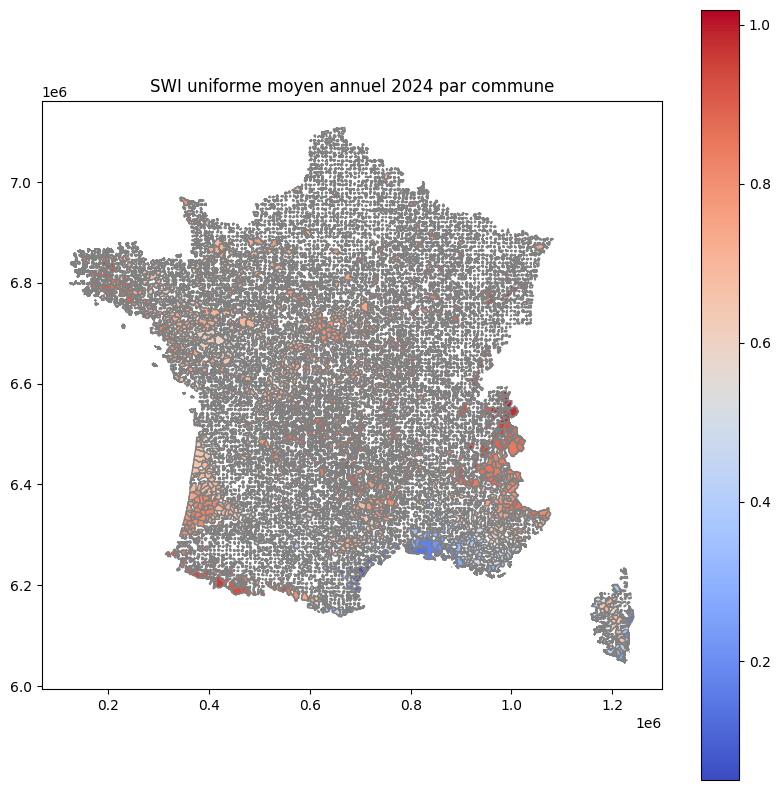

In [ ]:
import matplotlib.pyplot as plt

# --- Étape 1 : convertir MOIS en datetime ---
gdf_swi['MOIS'] = pd.to_datetime(gdf_swi['MOIS'], format='%Y-%m')

# --- Étape 2 : filtrer pour l'année 2024 ---
gdf_swi_2024 = gdf_swi[gdf_swi['MOIS'].dt.year == 2024]

# --- Étape 3 : moyenne annuelle du SWI par commune ---
df_swi_2024_mean = (
    gdf_swi_2024
    .groupby('code_insee')['SWI_UNIF_MENS']
    .mean()
    .reset_index()
    .rename(columns={'SWI_UNIF_MENS': 'SWI_2024'})
)

# --- Étape 4 : ajouter la géométrie des communes ---
gdf_swi_2024_mean = gdf_communes[['code_insee', 'geometry']].merge(
    df_swi_2024_mean,
    on='code_insee',
    how='left'
)

# --- Étape 5 : convertir en GeoDataFrame ---
gdf_swi_2024_mean = gpd.GeoDataFrame(gdf_swi_2024_mean, geometry='geometry')
gdf_swi_2024_mean.crs = gdf_communes.crs

# --- Étape 6 : représentation cartographique ---
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_swi_2024_mean.plot(
    column='SWI_2024',
    cmap='coolwarm',
    legend=True,
    ax=ax,
    edgecolor='lightgrey'
)
ax.set_title("SWI uniforme moyen annuel 2024 par commune")
plt.show()


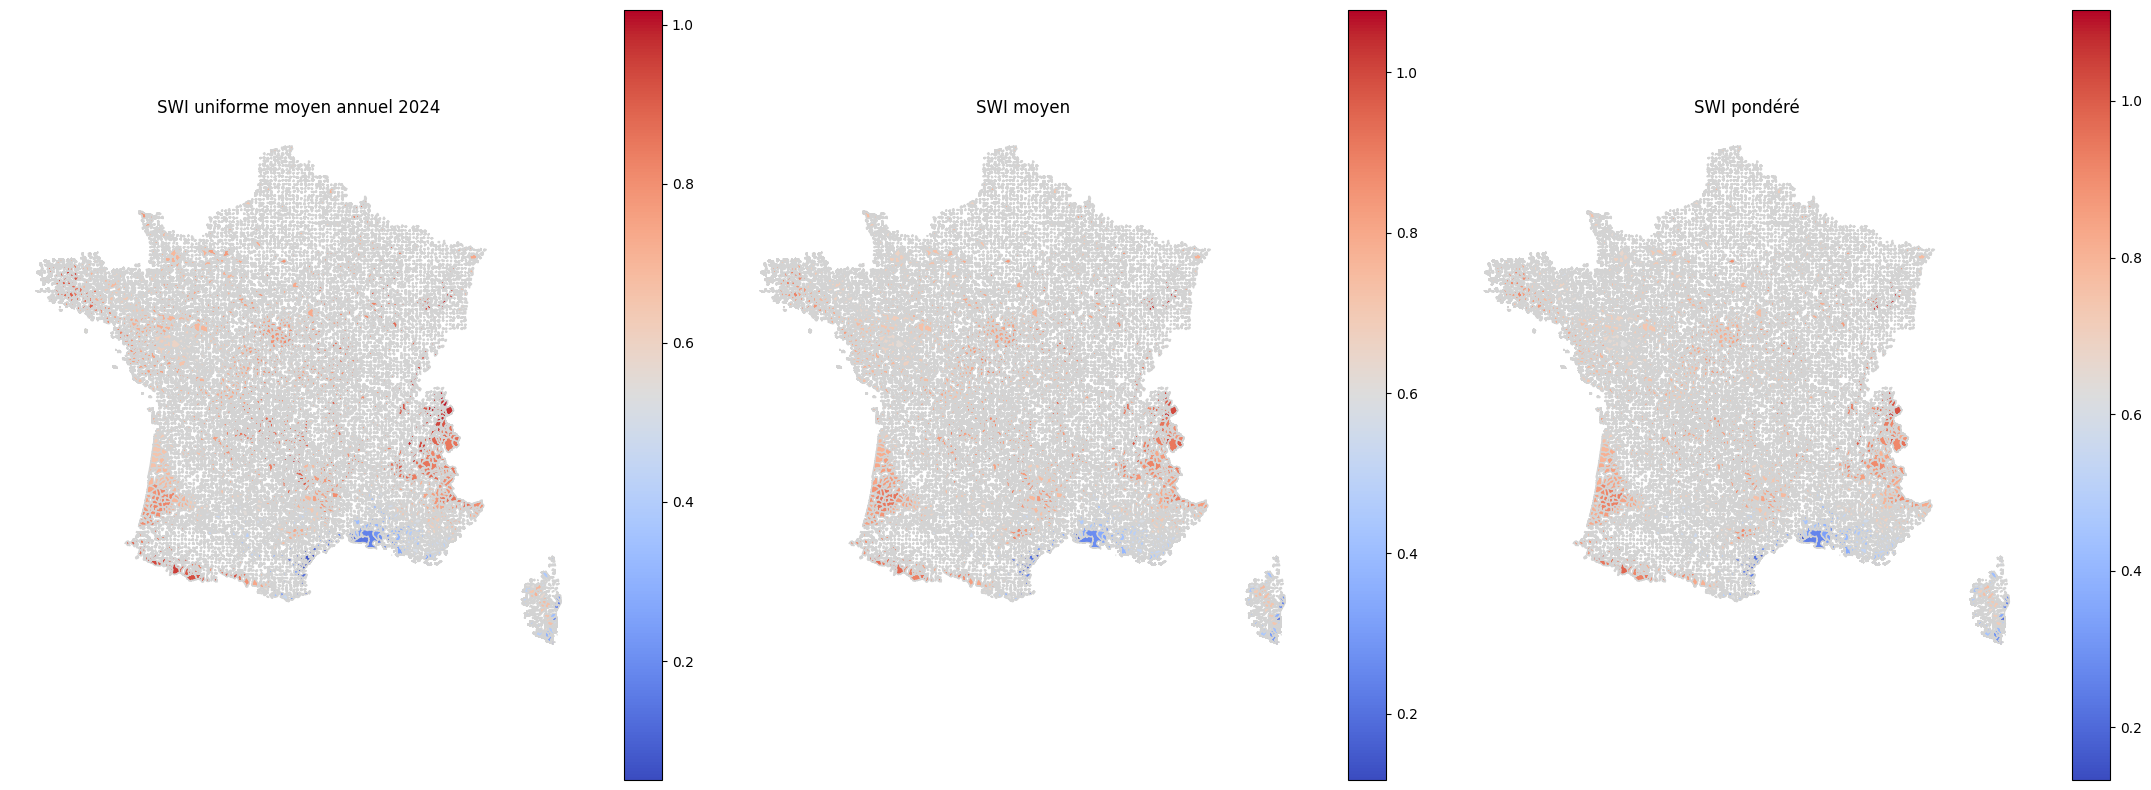

In [43]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

# --- Étape 1 : convertir MOIS en datetime ---
gdf_swi['MOIS'] = pd.to_datetime(gdf_swi['MOIS'], format='%Y-%m')

# --- Étape 2 : filtrer pour l'année 2024 ---
gdf_swi_2024 = gdf_swi[gdf_swi['MOIS'].dt.year == 2024]

# --- Étape 3 : moyenne annuelle par commune pour chaque variable ---
# SWI uniforme
df_swi_2024_mean = (
    gdf_swi_2024.groupby('code_insee')['SWI_UNIF_MENS']
    .mean().reset_index().rename(columns={'SWI_UNIF_MENS': 'SWI_2024'})
)

# SWI moyen
df_swi_mean = (
    gdf_swi_2024.groupby('code_insee')['SWI_mean']
    .mean().reset_index()
)

# SWI pondéré
df_swi_weighted = (
    gdf_swi_2024.groupby('code_insee')['SWI_weighted']
    .mean().reset_index()
)

# --- Étape 4 : fusion avec la géométrie ---
gdf_swi_plot = gdf_communes[['code_insee', 'geometry']].merge(
    df_swi_2024_mean, on='code_insee', how='left'
).merge(
    df_swi_mean, on='code_insee', how='left'
).merge(
    df_swi_weighted, on='code_insee', how='left'
)

# --- Étape 5 : convertir en GeoDataFrame ---
gdf_swi_plot = gpd.GeoDataFrame(gdf_swi_plot, geometry='geometry')
gdf_swi_plot.crs = gdf_communes.crs

# --- Étape 6 : tracer les trois cartes côte à côte ---
fig, axes = plt.subplots(1, 3, figsize=(22, 8))

cols = ['SWI_2024', 'SWI_mean', 'SWI_weighted']
titles = ['SWI uniforme moyen annuel 2024',
          'SWI moyen',
          'SWI pondéré']

for ax, col, title in zip(axes, cols, titles):
    gdf_swi_plot.plot(
        column=col,
        cmap='coolwarm',
        legend=True,
        ax=ax,
        edgecolor='lightgrey'
    )
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()
